In [54]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
boston = load_boston()

In [55]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
NUM_TREES = 10
MAX_DEPTH = 5
BASE_SCORE = 0.5

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [56]:
data['PRICE'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [57]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [58]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]

In [59]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/home/mattfel/slac/timetool-ML-models/xgboost/boost/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/mattfel/slac/timetool-ML-models/xgboost/boost/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [61]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          base_score = BASE_SCORE,
                          colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = MAX_DEPTH, 
                          alpha = 10, 
                          n_estimators = NUM_TREES)


In [62]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[10:29:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [63]:
print(X_test)
print(preds)

         CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS   RAD    TAX  \
410  51.13580   0.0  18.10   0.0  0.5970  5.757  100.0  1.4130  24.0  666.0   
85    0.05735   0.0   4.49   0.0  0.4490  6.630   56.1  4.4377   3.0  247.0   
280   0.03578  20.0   3.33   0.0  0.4429  7.820   64.5  4.6947   5.0  216.0   
422  12.04820   0.0  18.10   0.0  0.6140  5.648   87.6  1.9512  24.0  666.0   
199   0.03150  95.0   1.47   0.0  0.4030  6.975   15.3  7.6534   3.0  402.0   
..        ...   ...    ...   ...     ...    ...    ...     ...   ...    ...   
229   0.44178   0.0   6.20   0.0  0.5040  6.552   21.4  3.3751   8.0  307.0   
159   1.42502   0.0  19.58   0.0  0.8710  6.510  100.0  1.7659   5.0  403.0   
196   0.04011  80.0   1.52   0.0  0.4040  7.287   34.1  7.3090   2.0  329.0   
345   0.03113   0.0   4.39   0.0  0.4420  6.014   48.5  8.0136   3.0  352.0   
467   4.42228   0.0  18.10   0.0  0.5840  6.003   94.5  2.5403  24.0  666.0   

     PTRATIO       B  LSTAT  
410     20.2    2.60 

In [64]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[10:29:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:29:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:29:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [65]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.975679
Name: test-rmse-mean, dtype: float64


In [66]:
df2 = pd.DataFrame({"CRIM":[0.03578],
"ZN":[20],
"INDUS":[3.33],
"CHAS":[0],
"NOX":[0.4429],
"RM":[7.82],
"AGE":[64.5],
"DIS":[4.6947],
"RAD":[5],
"TAX":[216],
"PTRATIO":[14.9],
"B":[387.31],
"LSTAT":[3.76]}
) 
print(xg_reg.predict(df2))

[24.354538]


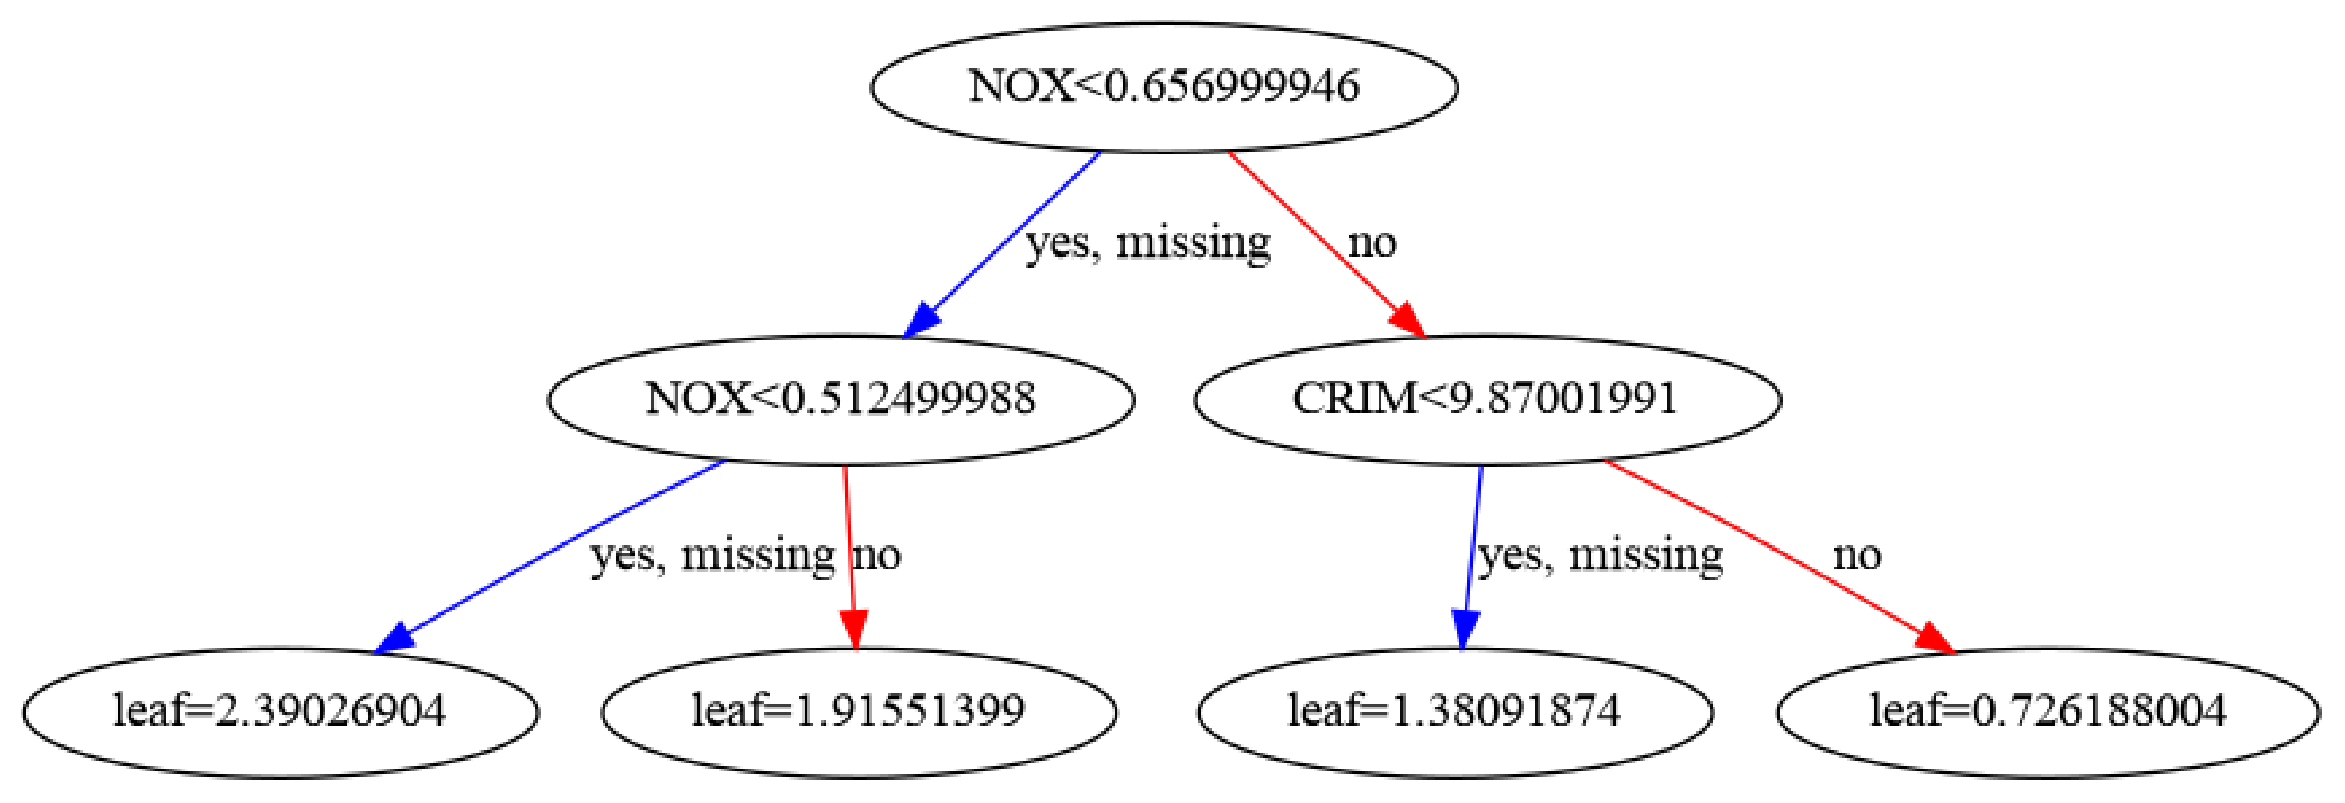

In [49]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100
xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()

In [51]:
import pickle
import json
import jsonpickle
xg_reg.get_booster().dump_model('example_params')
# xg_reg.get_booster().get_dump()
numlines = len(open('example_params').readlines(  ))

import numpy
import math
fields = {}
threshes = {}
lefts = {}
rights = {}
tree = -1
num_nodes = int(math.pow(2,MAX_DEPTH+1))

with open('example_params') as file:
    for cnt, line in enumerate(file):
        if (not 'booster' in line):
            idx = int(line.strip().split(':')[0])
            if ('leaf=' in line):
                thresh = float(line.strip().split('leaf=')[-1])
                fields[idx] = ''
                threshes[idx] = thresh
            else:
                fields[idx] = line.strip().split('[')[1].split('<')[0]
                threshes[idx] = float(line.strip().split('[')[1].split('<')[1].split(']')[0])
                lefts[idx] = int(line.strip().split('yes=')[1].split(',')[0])
                rights[idx] = int(line.strip().split('no=')[1].split(',')[0])
        if (('booster' in line and cnt != 0) or cnt == numlines-1):
            tree = tree + 1
#             print('Tree %d: ' % tree)
            scala = ['("", 0.to[T])' for i in range(num_nodes)]
    
            # Decompress the tree into a complete tree
            leftsArr = [lefts[0]]
            rightsArr = [rights[0]]
            scala[0] = '("%s", %f.to[T])' % (fields[0], threshes[0])
            for idx in range(1,num_nodes):
                if (idx % 2 == 1 and leftsArr[int(idx/2)] != None):
                    lookup = leftsArr[int(idx/2)]
                elif (idx % 2 == 0 and rightsArr[int(idx/2)-1] != None):
                    lookup = rightsArr[int(idx/2)-1]
                else: lookup = None
                
                if (lookup != None):
                    scala[idx] = '("%s", %f.to[T])' % (fields[lookup], threshes[lookup])
                    if (lookup in lefts):
                        leftsArr.append(lefts[lookup])
                    else:
                        leftsArr.append(None)
                    if (lookup in rights):
                        rightsArr.append(rights[lookup])
                    else:
                        rightsArr.append(None)
                else:
                    leftsArr.append(None)
                    rightsArr.append(None)


            print('val tree%d = List(' % tree + ','.join(scala).replace(' ','') + ')')
            fields = {}
            threshes = {}
            lefts = {}
            rights = {}
        
print('val trees = List(%s)' % ','.join(['tree%d' % d for d in range(tree+1)]))
print('val bias_score = %f' % BASE_SCORE)
#         print("Line {}: {}".format(cnt, line))




val tree0 = List(("RM",6.978000.to[T]),("PTRATIO",19.900001.to[T]),("RM",7.437000.to[T]),("",2.210812.to[T]),("",1.567436.to[T]),("",3.133333.to[T]),("",4.387600.to[T]),("",0.to[T]))
val tree1 = List(("NOX",0.657000.to[T]),("NOX",0.512500.to[T]),("CRIM",9.870020.to[T]),("",2.390269.to[T]),("",1.915514.to[T]),("",1.380919.to[T]),("",0.726188.to[T]),("",0.to[T]))
val trees = List(tree0,tree1)
val bias_score = 0.500000
